In [2]:
%pylab inline
import pandas as pd
import numpy as np
import sklearn as sk
print 'pandas version: ',pd.__version__,'should be at least 0.14.0'
print 'numpy version:',np.__version__,'should be at least 1.8.1'
print 'sklearn version:',sk.__version__,'should be at least 0.14.1'

Populating the interactive namespace from numpy and matplotlib
pandas version:  0.20.1 should be at least 0.14.0
numpy version: 1.13.3 should be at least 1.8.1
sklearn version: 0.18.1 should be at least 0.14.1


**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time. (7)

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe.
3. Construct the Term and Default premium series using basic math on the series, and merge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data. Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following: i. dropping the rows with null values ii. Output data regularly to see if they are following regular format. Use pandas.series.pct_change/pandas.DataFrame.cumsum wherever necessary (2)
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly <-- Monthly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                                     


In [4]:
%cd data/economics/
filenames = !ls
print filenames

[Errno 2] No such file or directory: 'data/economics/'
/Users/tushar/Desktop/dse200/Homework/HW3_Solutions/data/economics
['AAA.csv', 'BAA.csv', 'CPILFESL.csv', 'GDPC1.csv', 'GS1.csv', 'GS10.csv', 'INDPRO.csv', 'UNRATE.csv']


In [5]:
data = []
for filename in filenames:
    code = filename.split('.')[0]
    df = pd.read_csv(filename, header=0, skiprows=0, names=['Date', code], parse_dates=['Date'])
    df = df.set_index('Date')
    data.append(df)
    
final_df = pd.concat(data, axis=1)
print final_df.head()

             AAA   BAA  CPILFESL  GDPC1  GS1  GS10  INDPRO  UNRATE
Date                                                              
1919-01-01  5.35  7.12       NaN    NaN  NaN   NaN  4.8582     NaN
1919-02-01  5.35  7.20       NaN    NaN  NaN   NaN  4.6435     NaN
1919-03-01  5.39  7.15       NaN    NaN  NaN   NaN  4.5092     NaN
1919-04-01  5.44  7.23       NaN    NaN  NaN   NaN  4.5898     NaN
1919-05-01  5.39  7.09       NaN    NaN  NaN   NaN  4.6166     NaN


In [6]:
# 3

term_premium = final_df['GS10'] - final_df['GS1']
default_premium = final_df['BAA'] - final_df['AAA']

print term_premium.head()
print default_premium.head()

term_premium_df = pd.DataFrame(term_premium, columns=['term_premium'])
default_premium_df = pd.DataFrame(default_premium, columns=['default_premium'])

premium_df = term_premium_df.join(default_premium_df)

Date
1919-01-01   NaN
1919-02-01   NaN
1919-03-01   NaN
1919-04-01   NaN
1919-05-01   NaN
Freq: MS, dtype: float64
Date
1919-01-01    1.77
1919-02-01    1.85
1919-03-01    1.76
1919-04-01    1.79
1919-05-01    1.70
Freq: MS, dtype: float64


In [7]:
premium_df.head()

,term_premium,default_premium
Date,,
1919-01-01,NaN,1.77
1919-02-01,NaN,1.85
1919-03-01,NaN,1.76
1919-04-01,NaN,1.79
1919-05-01,NaN,1.70


Text(0,0.5,u'Percent Change of GDP per Quarter')

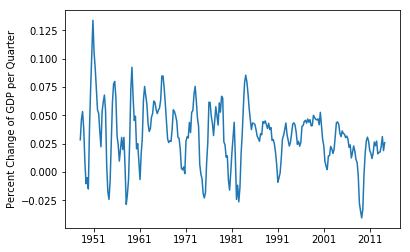

In [8]:
#4

plt.plot(final_df.GDPC1[final_df.GDPC1.notnull()].pct_change(4))
plt.ylabel('Percent Change of GDP per Quarter')

Text(0,0.5,u'Percentage change of Industrial Production per month')

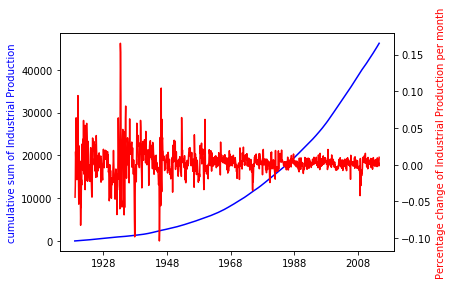

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(final_df.INDPRO[final_df.INDPRO.notnull()].cumsum(), color='b')
ax1.set_ylabel('cumulative sum of Industrial Production', color='b')

ax2 = ax1.twinx()
ax2.plot(final_df.INDPRO[final_df.INDPRO.notnull()].pct_change(1), color='r')
ax2.set_ylabel('Percentage change of Industrial Production per month', color='r')



Text(0,0.5,u'GDPC1')

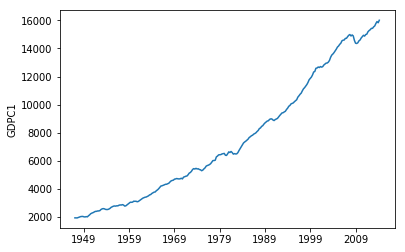

In [11]:
#5
plt.plot(final_df.GDPC1[final_df.GDPC1.notnull()])
plt.ylabel('GDPC1')

# Plotting pct change is same as above.

Text(0,0.5,u'INDPRO')

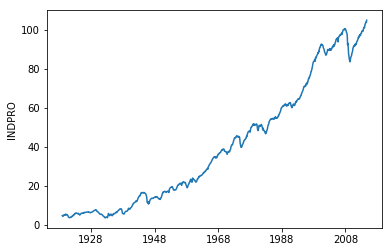

In [14]:
plt.plot(final_df.INDPRO[final_df.INDPRO.notnull()])
plt.ylabel('INDPRO')

Text(0,0.5,u'UNRATE')

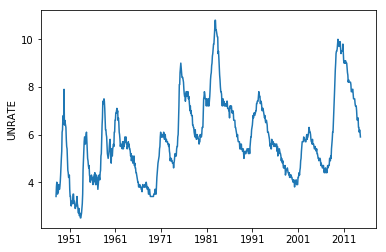

In [16]:
plt.plot(final_df.UNRATE[final_df.UNRATE.notnull()])
plt.ylabel('UNRATE')

#### Similar Analysis can be performed for other columns as well.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e327d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e7413d0>]], dtype=object)

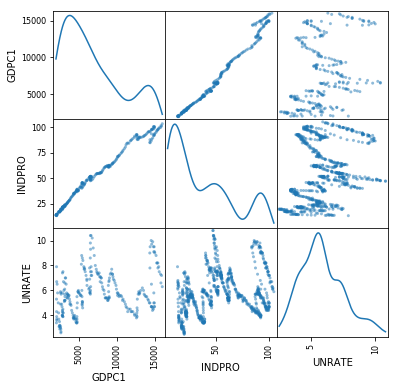

In [89]:
#6
pd.scatter_matrix(final_df[["GDPC1", "INDPRO", "UNRATE"]], alpha=0.5, figsize=(6, 6), diagonal='kde')

**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
>
> db = json.load(open('../data/Nutrition/foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary. (1)

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary) (1)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). (1)

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns. (1)

Using the foods DataFrame you have been building, compute the following things (2):

1. The food item with the highest content of each nutrient. 
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

In [8]:
import json
db = json.load(open('data/Nutrition/foods-2011-10-03.json'))

In [9]:
meta_cols = ['description', 'group', 'id', 'manufacturer']
meta_df = pd.DataFrame(db, columns=meta_cols)

In [10]:
meta_df.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
df_list = []

for record in db:
    record_df = pd.DataFrame(record['nutrients'])
    record_df['id'] = record['id']
    df_list.append(record_df)

nutrient_df = pd.concat(df_list, ignore_index=True)
print "duplicates: ", nutrient_df.duplicated().sum()
nutrient_df = nutrient_df.drop_duplicates()
print "duplicates: ", nutrient_df.duplicated().sum()

duplicates:  14179


In [15]:
nutrient_df.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [16]:
meta_df.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [17]:
nutrient_df_col_map = {'description': 'nutrient_description',
                     'group': 'nutrient_group'}
nutrient_df = nutrient_df.rename(columns=nutrient_df_col_map)
nutrient_df.head()

,nutrient_description,nutrient_group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [18]:
meta_df_col_map = {'description': 'meta_data_description',
                     'group': 'meta_data_group'}
meta_df = meta_df.rename(columns=meta_df_col_map)
meta_df.head()

,meta_data_description,meta_data_group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [19]:
final_df = pd.merge(meta_df, nutrient_df, on='id', how='outer')
final_df.head()

,meta_data_description,meta_data_group,id,manufacturer,nutrient_description,nutrient_group,units,value
0,"Cheese, caraway",Dairy and Egg Products,1008,,Protein,Composition,g,25.18
1,"Cheese, caraway",Dairy and Egg Products,1008,,Total lipid (fat),Composition,g,29.20
2,"Cheese, caraway",Dairy and Egg Products,1008,,"Carbohydrate, by difference",Composition,g,3.06
3,"Cheese, caraway",Dairy and Egg Products,1008,,Ash,Other,g,3.28
4,"Cheese, caraway",Dairy and Egg Products,1008,,Energy,Energy,kcal,376.00


In [25]:
#1

final_df.loc[final_df.groupby('nutrient_description')['value'].idxmax(), ['nutrient_description', 'meta_data_description', 'value']]

,nutrient_description,meta_data_description,value
211922,Adjusted Protein,"Baking chocolate, unsweetened, squares",12.900
216406,Alanine,"Gelatins, dry powder, unsweetened",8.009
338824,"Alcohol, ethyl","Alcoholic beverage, distilled, all (gin, rum, ...",42.500
142594,Arginine,"Seeds, sesame flour, low-fat",7.436
218421,Ash,"Desserts, rennin, tablets, unsweetened",72.500
172767,Aspartic acid,Soy protein isolate,10.203
33610,Beta-sitosterol,"Oil, vegetable, Natreon canola, high stability...",426.000
230328,Betaine,"Quinoa, uncooked",630.400
336702,Caffeine,"Tea, instant, unsweetened, powder",3680.000
201671,"Calcium, Ca","Leavening agents, baking powder, double-acting...",7364.000


meta_data_group
Fats and Oils                        0.020
Beverages                            0.040
Fruits and Fruit Juices              0.100
Soups, Sauces, and Gravies           0.200
Vegetables and Vegetable Products    0.330
Sweets                               0.360
Baby Foods                           0.590
Meals, Entrees, and Sidedishes       0.630
Baked Products                       0.660
Finfish and Shellfish Products       0.670
Restaurant Foods                     0.800
Ethnic Foods                         1.045
Cereal Grains and Pasta              1.090
Legumes and Legume Products          1.140
Fast Foods                           1.250
Dairy and Egg Products               1.330
Snacks                               1.470
Sausages and Luncheon Meats          2.130
Pork Products                        2.320
Poultry Products                     2.500
Spices and Herbs                     2.750
Breakfast Cereals                    2.885
Nut and Seed Products                3

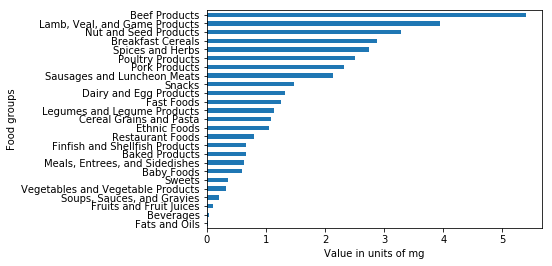

In [23]:
#2.

def quantile_plot(nutrient_name, quantile_value):
    
    
    
    filtered_df = final_df[final_df['nutrient_description'] == nutrient_name]
    unit = filtered_df['units'].iloc[0]
    grouped_df = filtered_df[filtered_df['units'] == unit]\
                        .groupby(['meta_data_group'])['value']\
                        .quantile(quantile_value)\
                        .sort_values(ascending= True)
    print grouped_df
#     plt.barh(grouped_df.index, grouped_df.values, align='center', alpha=0.5)
    grouped_df.plot(kind='barh')
    plt.xlabel('Value in units of %s' % unit)
    plt.ylabel('Food groups')
    
quantile_plot('Zinc, Zn', .5)

# Add Sorting 

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

Visualize the first 15 digits to get a better understanding of the data

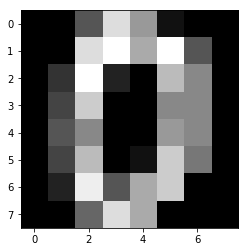

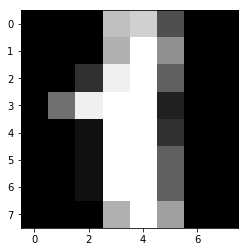

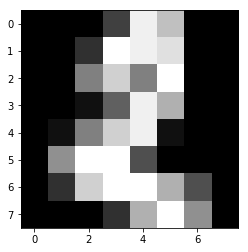

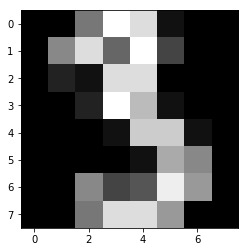

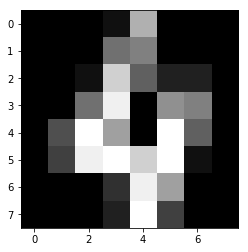

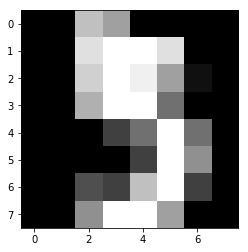

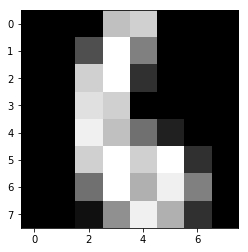

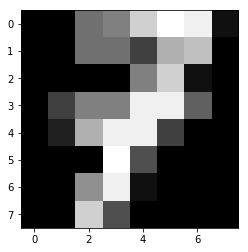

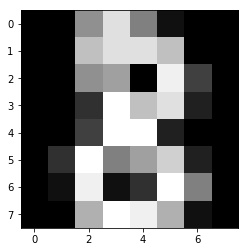

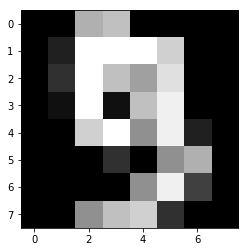

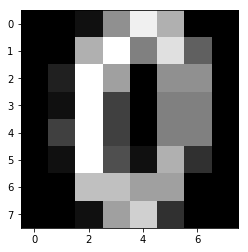

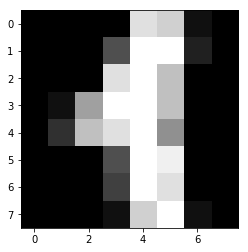

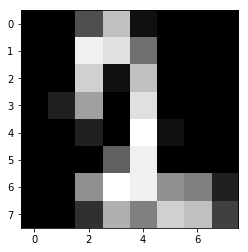

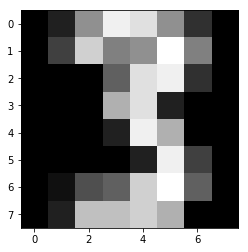

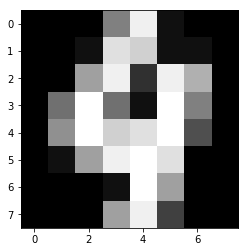

In [75]:
for i in range(0, 15):
    plt.imshow(digits.images[i]) 
    plt.show()

**Dimensionality Reduction - PCA**

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components  (2)

Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
(this extended analysis need not be submitted as part of homework)


In [76]:
#print the shape before and after the PCA
print "Before PCA: %s" % str(digits.data.shape)

from sklearn.decomposition import PCA
K=30
pca = PCA(n_components=K)
pca.fit(digits.data)
T=pca.transform(digits.data)
print "After PCA: %s" % str(T.shape)

Before PCA: (1797, 64)
After PCA: (1797, 30)


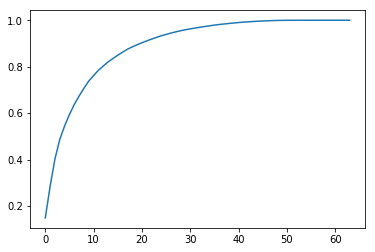

In [81]:
pca = PCA(n_components=64)
pca.fit(digits.data)
cumulative_explained = cumsum(pca.explained_variance_ratio_) 
plt.plot(cumulative_explained)

In [ ]:
#Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
#(this extended analysis need not be submitted as part of homework)
# bonus??